In [35]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import tqdm
from scipy.sparse import coo_array
import cartopy.crs as ccrs
import cartopy.feature as cfeature

%matplotlib inline

In [14]:
grids = xr.open_dataset(
    "/glade/u/home/wchapman/MLWPS/DataLoader/static_variables_ERA5_zhght.nc"
)

In [15]:
grids

<xarray.Dataset>
Dimensions:              (latitude: 640, longitude: 1280)
Coordinates:
  * latitude             (latitude) float64 89.78 89.51 89.23 ... -89.51 -89.78
  * longitude            (longitude) float64 0.0 0.2812 0.5625 ... 359.4 359.7
    time                 datetime64[ns] ...
    initial_time0_hours  datetime64[ns] ...
    forecast_time1       timedelta64[ns] ...
Data variables:
    SP                   (latitude, longitude) float32 ...
    utc_date             int32 ...
    weight               (latitude) float64 ...
    zero                 (latitude) float64 ...
    Z_GDS4_SFC           (latitude, longitude) float64 ...
    coslat               (latitude, longitude) float64 ...
Attributes: (12/18)
    RDA_DATASET:                            ds633.6
    RDA_DATASET_URL:                        https:/rda.ucar.edu/datasets/ds63...
    RDA_DATASET_DOI:                        DOI: 10.5065/XV5R-5344
    RDA_DATASET_GROUP:                      ERA5 atmospheric model level anal...
    DATA_SOURCE:                            Downloaded by NCAR/CISL/DECS from...
    DOWNLOAD_SPECIALIST:                    Chi-Fan Shih, NCAR/CISL/DECS, chi...
    ...                                     ...
    NETCDF_COMPRESSION:                     Precision-preserving compression ...
    CONVERSION_AND_COMPRESSION_PLATFORM:    cheyenne node employed: Linux r1i...
    CONVERSION_AND_COMPRESSION_DATE:        Sun Jan 15 04:56:56 MST 2023
    CONVERSION_AND_COMPRESSION_SPECIALIST:  Dave Stepaniak, NCAR/CISL/DECS, d...
    history:                                Sun Jan 15 04:56:58 2023: ncks -4...
    NCO:                                    netCDF Operators version 5.0.3 (H...

In [2]:
ds = xr.open_dataset(
    "/glade/derecho/scratch/dgagne/credit_scalers/grid_edge_pairs_125.nc"
)

(1280,)

In [6]:
edges_sparse = coo_array(
    (ds["distances"].values, (ds["edges"].values[:, 0], ds["edges"].values[:, 1])),
    shape=(ds["longitude"].size, ds["latitude"].size),
).tocsr()

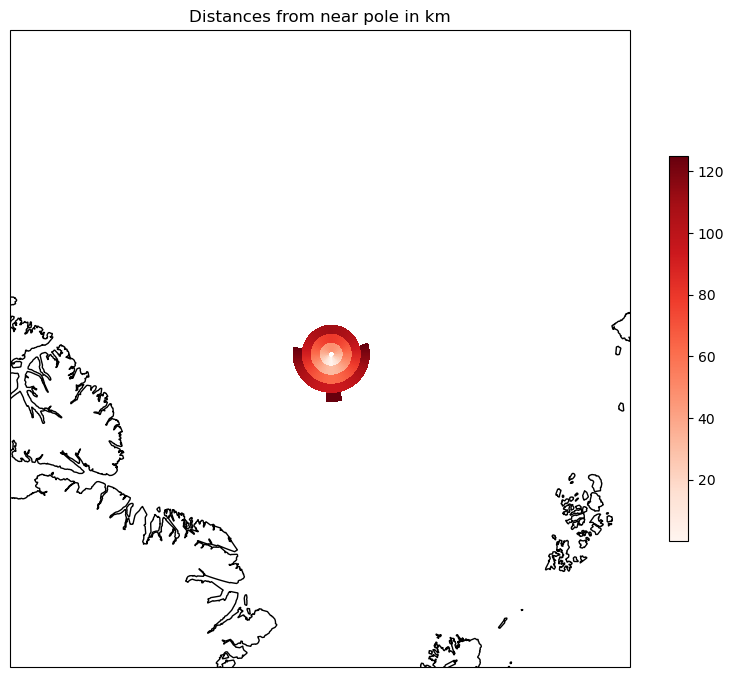

In [45]:
proj = ccrs.NorthPolarStereo()
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(1, 1, 1, projection=proj)
ax.set_extent([-180, 180, 80, 90], ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
dists = edges_sparse[[10], :].toarray().reshape(640, 1280)
c = ax.pcolormesh(
    grids["longitude"],
    grids["latitude"],
    np.ma.array(dists, mask=dists == 0),
    transform=ccrs.PlateCarree(),
    cmap="Reds",
)
plt.colorbar(c, shrink=0.5)
plt.title("Distances from near pole in km")
plt.savefig("grid_dists.png", dpi=300, bbox_inches="tight")

In [55]:
edges_sparse.shape

(2, 1154304)

In [12]:
ds["longitude"].values[50]

62.5

In [13]:
ds["latitude"].values[50]

-90.0

In [35]:
ds["index"].shape

(55296,)

In [31]:
n50 = np.where(ds["edges"][:, 0] == 3425)[0]

In [39]:
all_lons = ds["longitude"].values
all_lats = ds["latitude"].values
lons = []
lats = []
for g in tqdm.tqdm(range(ds["index"].size)):
    n50 = np.where(ds["edges"][:, 0] == g)[0]
    for i in n50:
        ni = ds["edges"][i, 1]
        lons.extend([all_lons[g], all_lons[ni], np.nan])
        lats.extend([all_lats[g], all_lats[ni], np.nan])

  0%|          | 50/55296 [00:22<6:54:51,  2.22it/s]


KeyboardInterrupt: 